# Datenexploration_2

**Notebook beinhaltet**:
1. [Datensatzverkleinerung nach Anzahl der Songs](#one)
2. [Visualisierungen des verkleinerten Datensatzes](#two)
3. [POS pro Genre](#three)

## Datensatzverkleinerung nach Anzahl der Songs <a name="one"></a>

### 100 Songs pro Band

In [2]:
import pandas as pd 
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [ ]:
df = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")
c = Counter(df.artist)
for v, k in c.items():
    if k<=99:
        df = df[df.artist!=v]

In [ ]:
g = df.groupby('artist')
df2 = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min())))

In [ ]:
df2 = df2.rename(columns={'artist': 'artists'})

In [ ]:
df2

In [ ]:
df2.to_csv("songs_100.csv")

### 25 Songs pro Band

In [ ]:
df = pd.read_csv("songs_100.csv")

In [ ]:
g = df.groupby('artists')
df3 = pd.DataFrame(g.apply(lambda group: group.iloc[75:, 75:]))

In [ ]:
df3.to_csv("songs_25.csv")
df3 = pd.read_csv("songs_25.csv")

In [ ]:
df3.set_index('Unnamed: 1', inplace = True)
df3['check'] = 'True'

In [ ]:
frames = [df, df3]
result = pd.concat(frames, axis=1)

In [ ]:
#alle rows, die NAN in der Spalte check sind, löschen
result.dropna(subset = ["check"], inplace=True)

In [ ]:
result.to_csv("songs_25.csv")

In [3]:
df = pd.read_csv("../songs_25.csv")

In [5]:
del df['Unnamed: 0']

In [6]:
df

,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS
0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...
1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...
2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True,bad bad bad sad loose cool bright romantic bad...
3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True,alive dead hollow smart sorry last sorry final...
4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True,mistaking right wrong special notion feeling m...
...,...,...,...,...,...,...,...,...
6795,ZZ Top,36-22-36,what what what you want? hey my thing is a ...,646,Rock,Pop,True,real fine real fine round thing thing thing th...
6796,ZZ Top,Deal Goin' Down,when the deal goin' down and you gonna take yo...,746,Rock,Pop,True,deal chance mystery trance future deal deal no...
6797,ZZ Top,Can't Stop Rockin',i heard about the rock for sometime i know. ...,995,Rock,Pop,True,easy wrong right low loose high rock roll rock...
6798,ZZ Top,I Got The Message,i'm picking up on a signal that's in the air ...,495,Rock,Pop,True,straight electric about empty straight straigh...


In [7]:
artists = list(np.unique(df.artists))
len(artists)

272

In [8]:
len(df)

6800

## Visualisierungen des verkleinerten Datensatzes <a name="two"></a>

In [3]:
df = pd.read_csv("../../songs_plus_dates.csv")

In [4]:
data1 = df[df['Genre1'] == 'Rock']
data2 = df[df['Genre1'] == 'Pop']

In [5]:
data = pd.concat([data1, data2], axis = 0)

In [6]:
data

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
83,83,Creepin' On The Mayor,Adam Sandler,/a/adam+sandler/creepin+on+the+mayor_20176471....,oh shit is that them crazy fucks from across...,oh shit is that them crazi fuck from across t...,crazy safe sound stupid dirty shittin safe unt...,"['UH', '_SP', 'NN', '_SP', 'VBZ', 'IN', 'PRP',...",Rock,Pop,comedy,comic,176.0,126.0,2004,2000s
84,84,Mr. Bake-O,Adam Sandler,/a/adam+sandler/mr+bake+o_10002543.html,i'm sitting in my chair watching the tv ...,i 'm sit in my chair watch the tv it 's not e...,crazy wicked last sweet baked chair tv plenty ...,"['_SP', 'PRP', 'VBP', 'VBG', 'IN', 'PRP$', 'NN...",Rock,Pop,comedy,comic,275.0,153.0,1996,1990s
85,85,Steve Polychronopolous,Adam Sandler,/a/adam+sandler/steve+polychronopolous_2000393...,i'm a big fuckin' dick i'm a pain in your ass...,i 'm a big fuckin ' dick i 'm a pain in your ...,big last tight extra polychronopolous pansy op...,"['PRP', 'VBP', 'DT', 'JJ', 'NN', ""''"", 'NNP', ...",Rock,Pop,comedy,comic,201.0,121.0,1996,1990s
86,86,The Adventures Of The Cow,Adam Sandler,/a/adam+sandler/the+adventures+of+the+cow_2000...,performed by adam sandler frank and randi t...,perform by adam sandler frank and randi trans...,6th little first hot french first big classy s...,"['VBN', 'IN', 'NNP', 'NNP', '_SP', 'NNP', '_SP...",Rock,Pop,comedy,comic,493.0,256.0,1996,1990s
87,87,The Psychotic Legend Of Uncle Donnie,Adam Sandler,/a/adam+sandler/the+psychotic+legend+of+uncle+...,holy shit this boat is sweet uncle donnie. i...,holi shit thi boat is sweet uncl donni . it m...,holy sweet fast fucking fucking sunny fucking ...,"['JJ', 'NNP', '_SP', 'DT', 'NN', 'VBZ', 'JJ', ...",Rock,Pop,comedy,comic,110.0,90.0,1999,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33430,33580,Fool For You,ZAYN,/z/zayn+malik/fool+for+you_21107629.html,[verse 1] this love is tainted i need you an...,[ vers 1 ] thi love is taint i need you and i...,verse love dream movie scene way fool fool ver...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'DT', 'N...",Pop,Rock,dance pop,electropop,190.0,70.0,2016,2010s
33431,33581,It's You,ZAYN,/z/zayn+malik/its+you_21107224.html,[verse 1] she got she got she got her own ...,[ vers 1 ] she got she got she got her own re...,own wrong verse fuck brain refrain verse silen...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'PRP', '...",Pop,Rock,dance pop,electropop,170.0,80.0,2016,2010s
33432,33582,Like I Would,ZAYN,/z/zayn+malik/like+i+would_21107223.html,[verse 1] hey what's up it's been a while t...,[ vers 1 ] hey what 's up it 's been a while ...,cold hearted hearted late wired good cold hear...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'UH', 'W...",Pop,Rock,dance pop,electropop,357.0,97.0,2016,2010s
33433,33583,PillowTalk,ZAYN,/z/zayn+malik/pillowtalk_21106267.html,[verse 1] climb on board we'll go slow and h...,[ vers 1 ] climb on board we 'll go slow and ...,slow high light dark hard mellow pre close clo...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'NN', 'I...",Pop,Rock,dance pop,electropop,363.0,98.0,2016,2010s


In [9]:
mean ={}
for a in artists:
    mean[a] = int(np.mean(df.number_of_tokens[df.artists==a]))

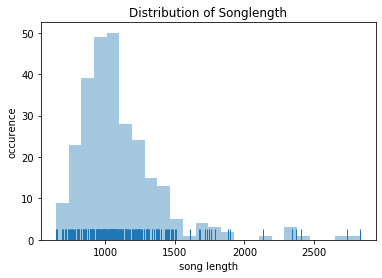

In [19]:
ax = sns.distplot(list(mean.values()), rug=True, kde=False)
ax.set_xlabel("song length")
ax.set_ylabel("occurence")
ax.set_title("Distribution of Songlength")
plt.savefig("data25/songlength_dist")
plt.show()

In [7]:
c = Counter(data1.genre1)

In [8]:
d = Counter(data2.genre2)

In [14]:
d

Counter({'swedish pop': 83,
         'comic': 53,
         'pop': 1112,
         'classic rock': 2368,
         'mellow gold': 726,
         'opm': 121,
         'country road': 153,
         'art rock': 2523,
         'blues rock': 1184,
         'alternative rock': 1076,
         'folk': 821,
         'europop': 430,
         'christian alternative rock': 296,
         'italian tenor': 9,
         'brill building pop': 939,
         'kingston on indie': 61,
         'candy pop': 54,
         'dance pop': 684,
         'british invasion': 353,
         'dance rock': 1549,
         'disco': 521,
         'motown': 138,
         'jazz blues': 407,
         'easy listening': 286,
         'birmingham metal': 313,
         'britpop': 229,
         nan: 421,
         'parody': 16,
         'rock': 259,
         'country rock': 937,
         'heartland rock': 136,
         'post-teen pop': 50,
         'oklahoma country': 97,
         'garage rock': 68,
         'hollywood': 216,
         '

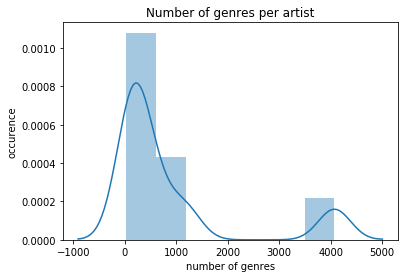

In [26]:
ax = sns.distplot(list(c.values()))
ax.set_xlabel("number of genres")
ax.set_ylabel("occurence")
plt.title("Number of genres per artist")
#plt.savefig("data25/genres1_per_artist")

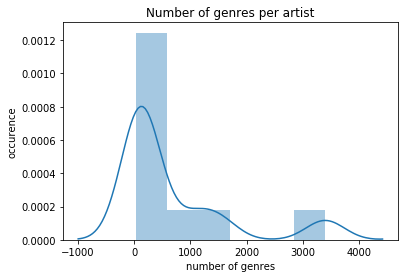

In [27]:
ax = sns.distplot(list(d.values()))
ax.set_xlabel("number of genres")
ax.set_ylabel("occurence")
plt.title("Number of genres per artist")
plt.savefig("data25/genres2_per_artist")

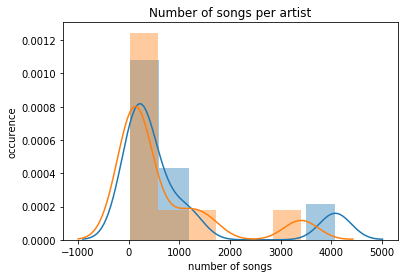

In [29]:
ax = sns.distplot((list(c.values())))
ax = sns.distplot(list(d.values()));
ax.set_xlabel("number of songs")
ax.set_ylabel("occurence")
plt.title("Number of songs per artist")
plt.savefig("data25/genres_all_per_artist")

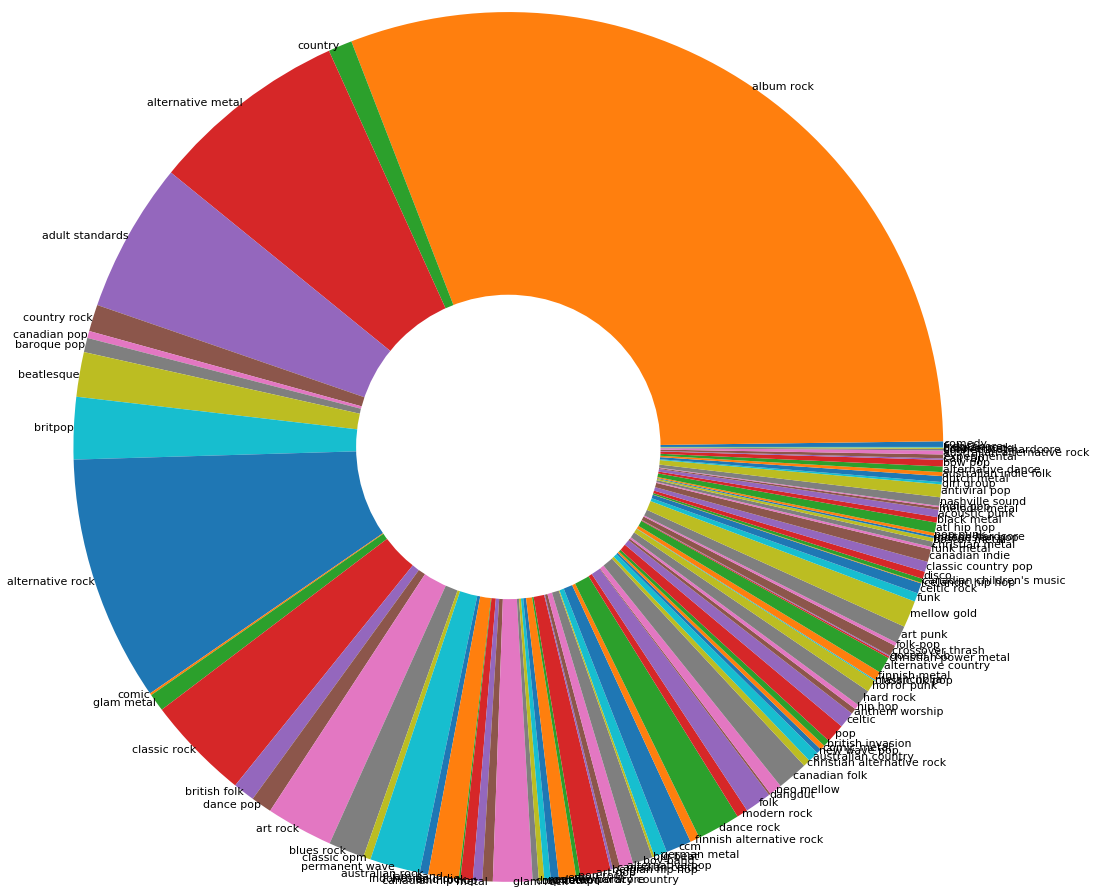

In [13]:
counts = Counter(data1.genre1)
plt.figure(figsize=(15,10))
plt.pie([float(v) for v in counts.values()], labels=[str(k) for k in counts],
           autopct=None, textprops={'fontsize': 11},  radius=2, labeldistance=1.0, rotatelabels = False)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("../../images/data25/new_genre1_all", bbox_inches = "tight")

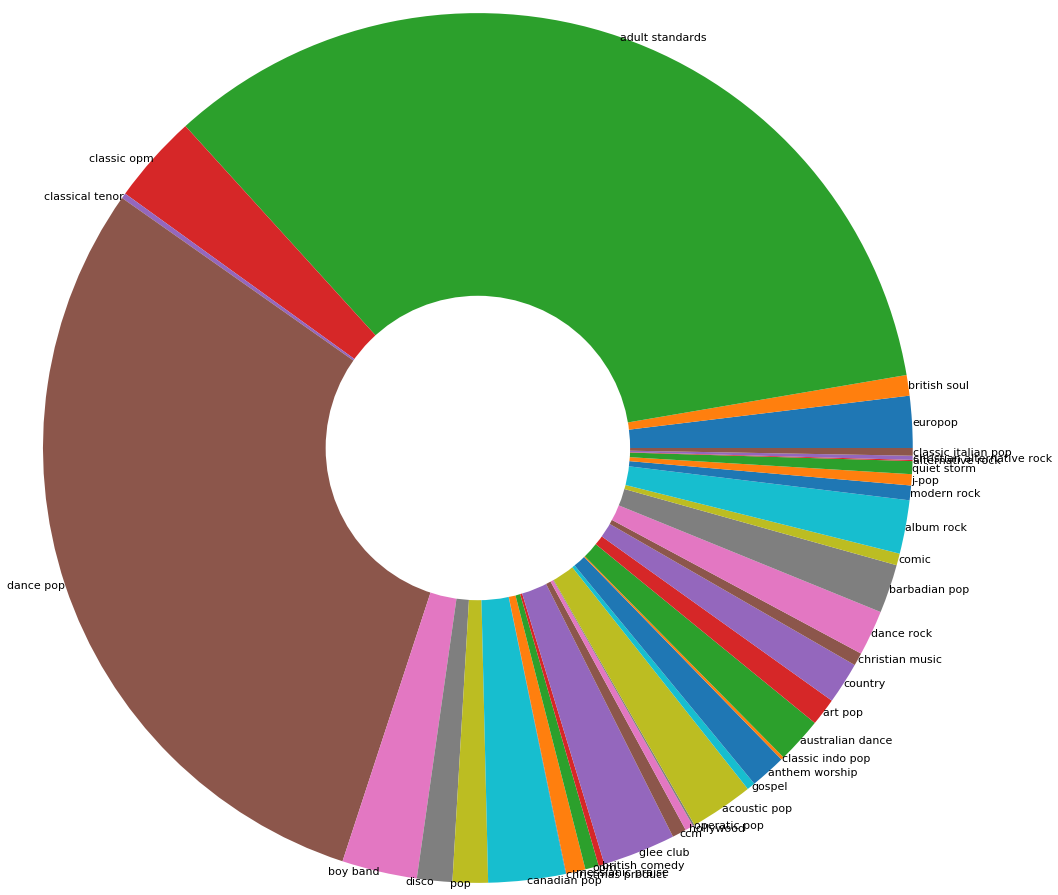

In [14]:
counts = Counter(data2.genre1)
plt.figure(figsize=(15,10))
plt.pie([float(v) for v in counts.values()], labels=[str(k) for k in counts],
           autopct=None, textprops={'fontsize': 11},  radius=2, labeldistance=1.0, rotatelabels = False)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("../../images/data25/new_genre2_all", bbox_inches = "tight")

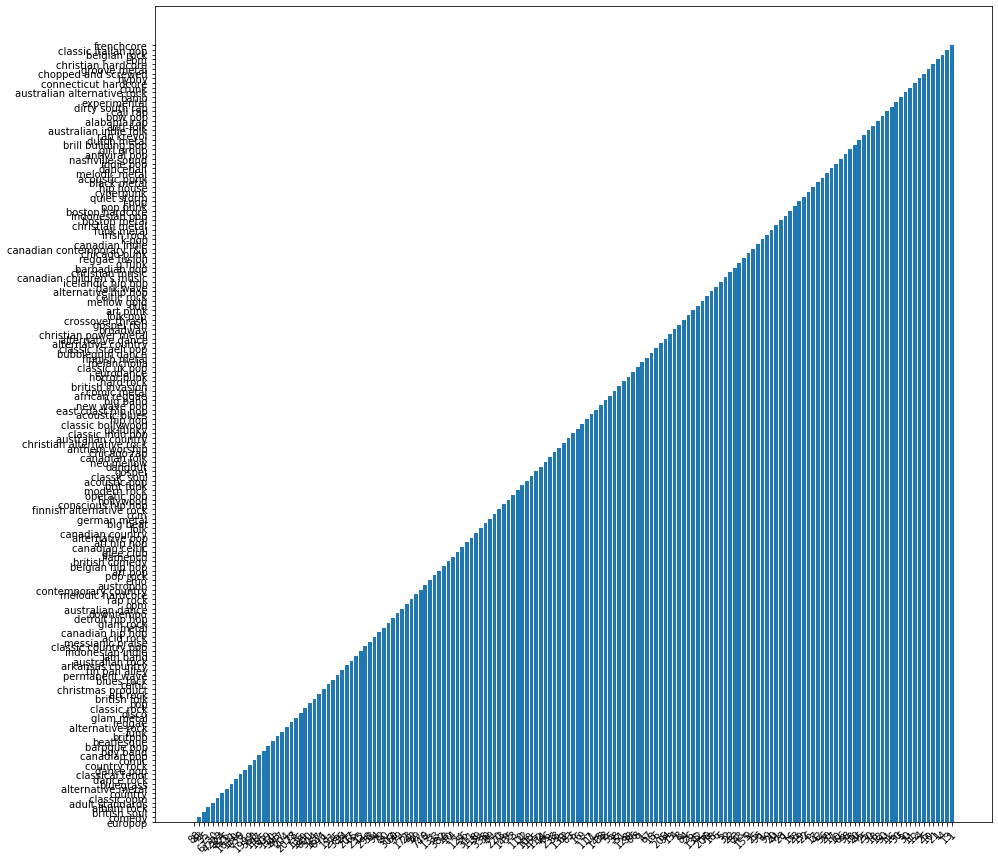

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))


plt.bar(range(len(c)), c.keys(), align='center')
plt.xticks(range(len(c)), list(c.values()), rotation = 45)

plt.show()


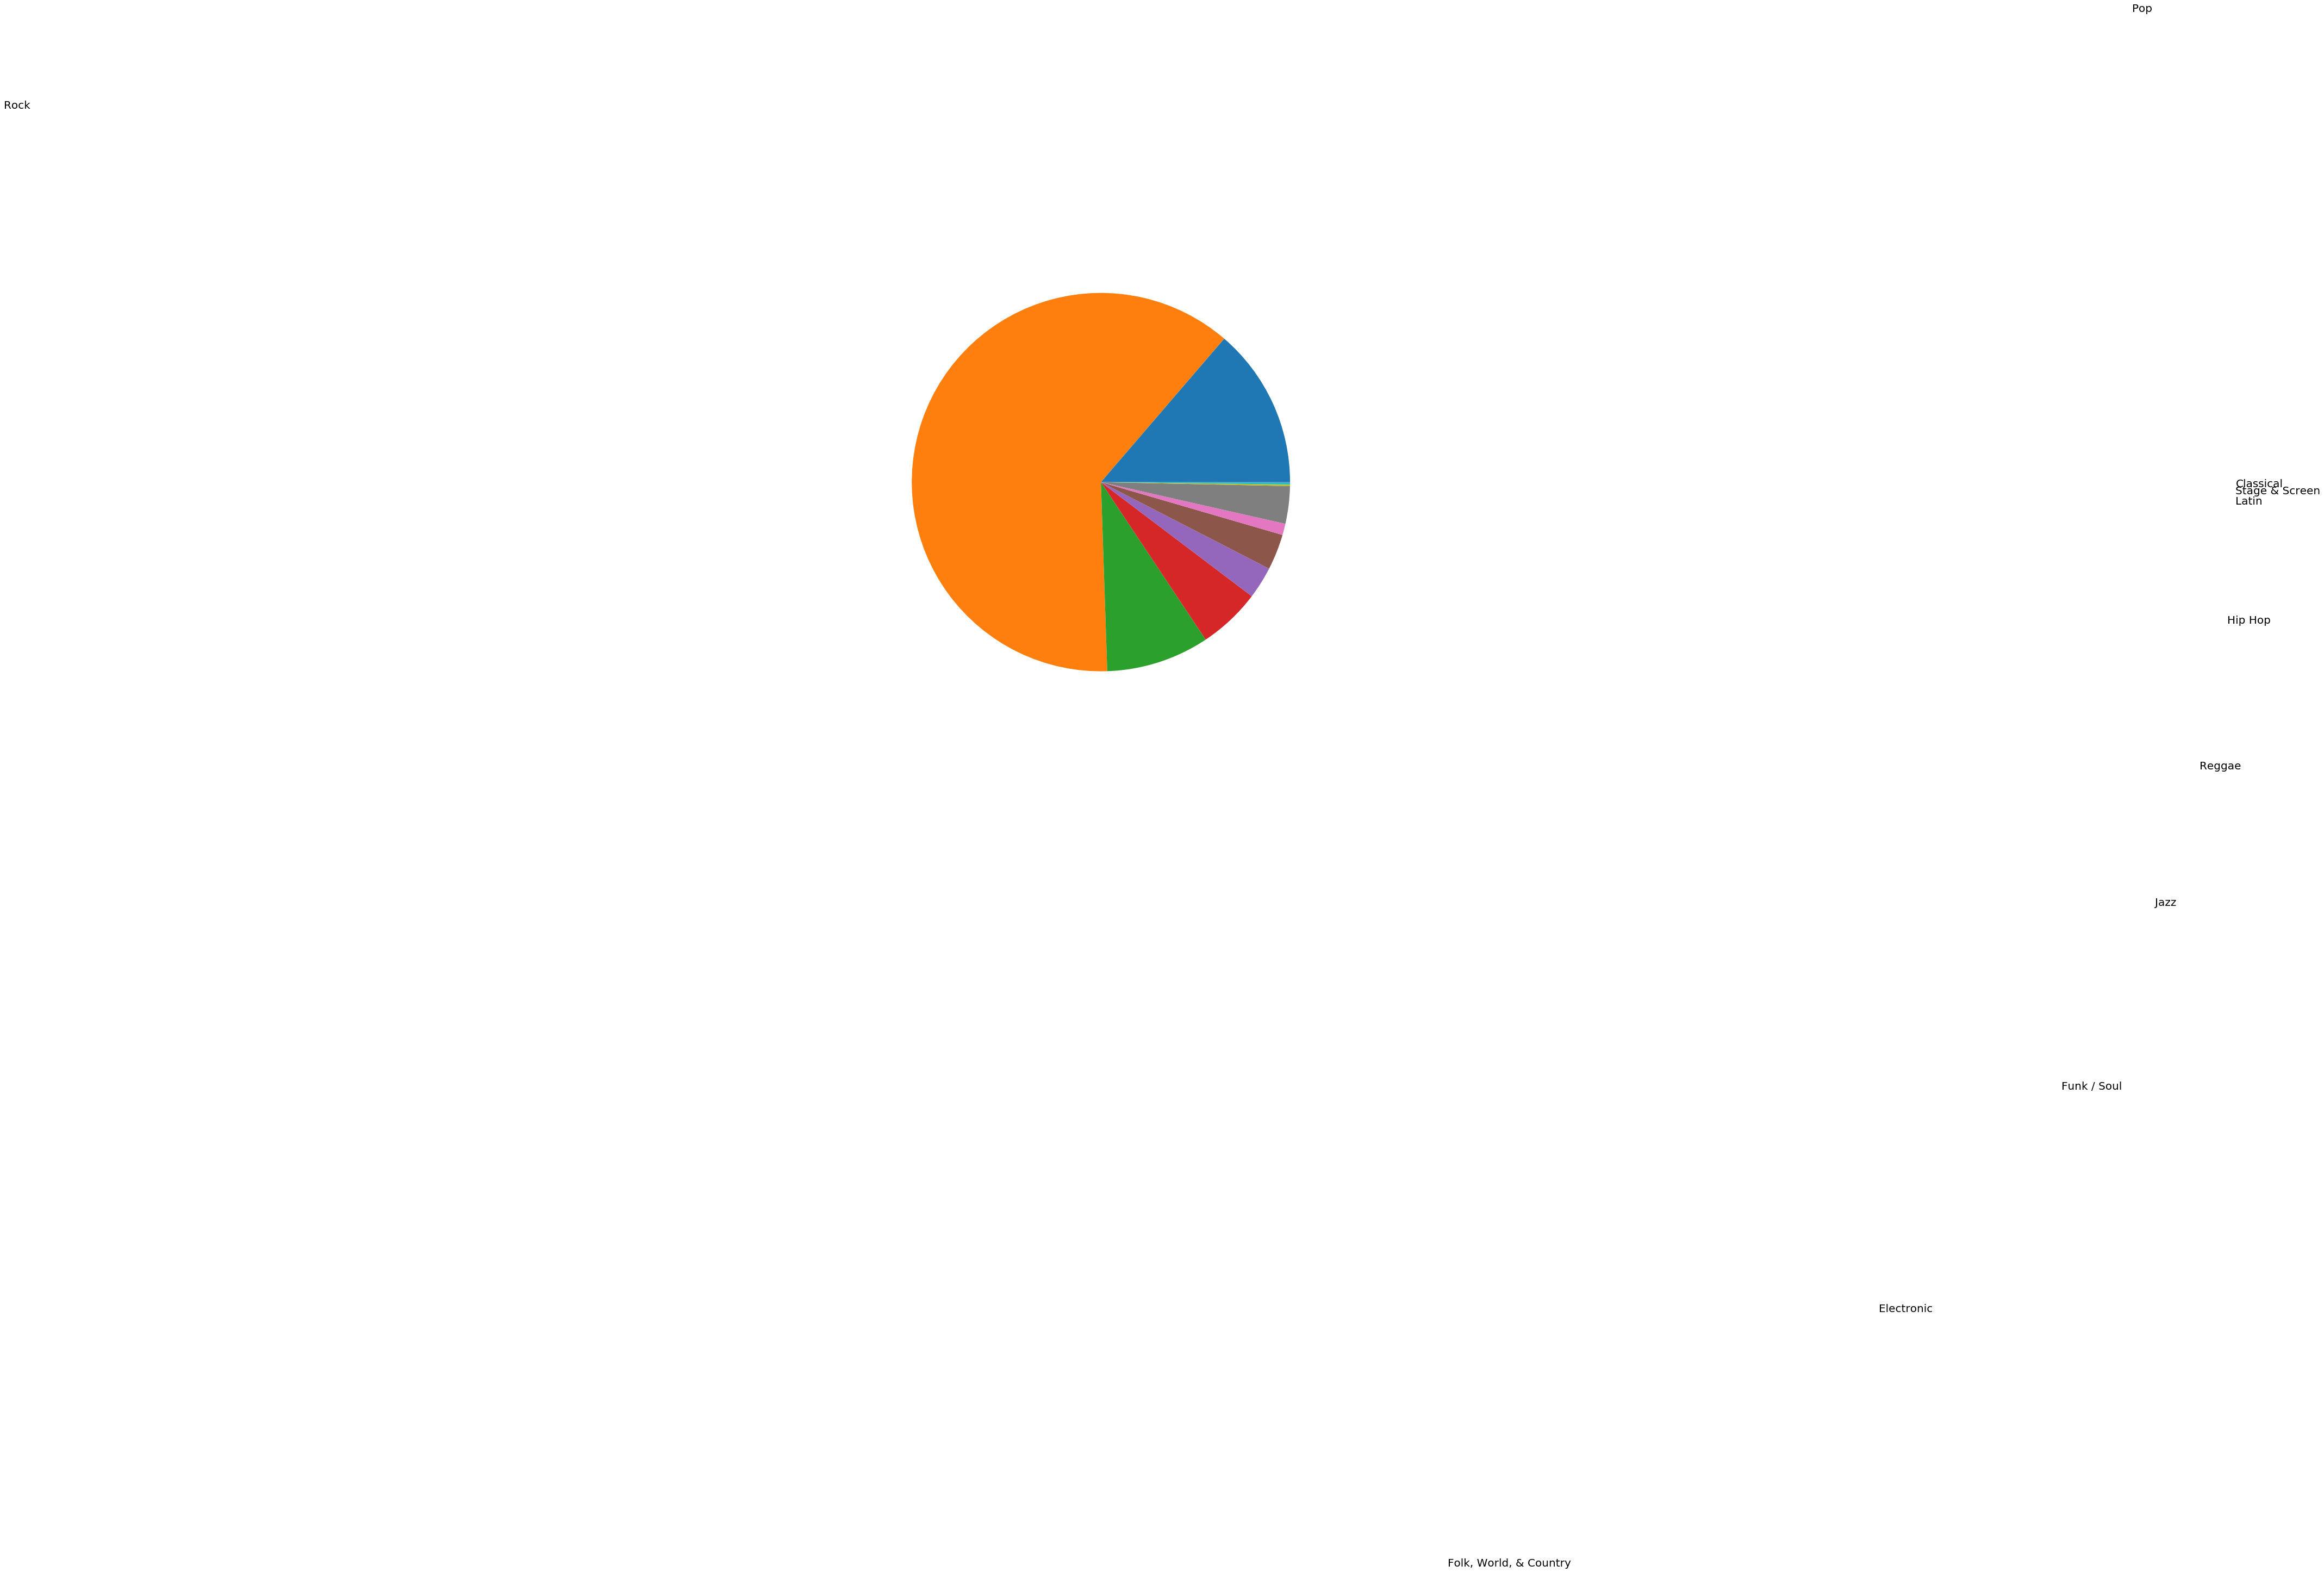

In [68]:
counts = Counter(df.Genre1)
plt.pie([float(v) for v in counts.values()], labels=[str(k) for k in counts],
           autopct=None, textprops={'fontsize': 20},  radius=4, labeldistance=, rotatelabels = False)
plt.savefig("data25/genre2_all")

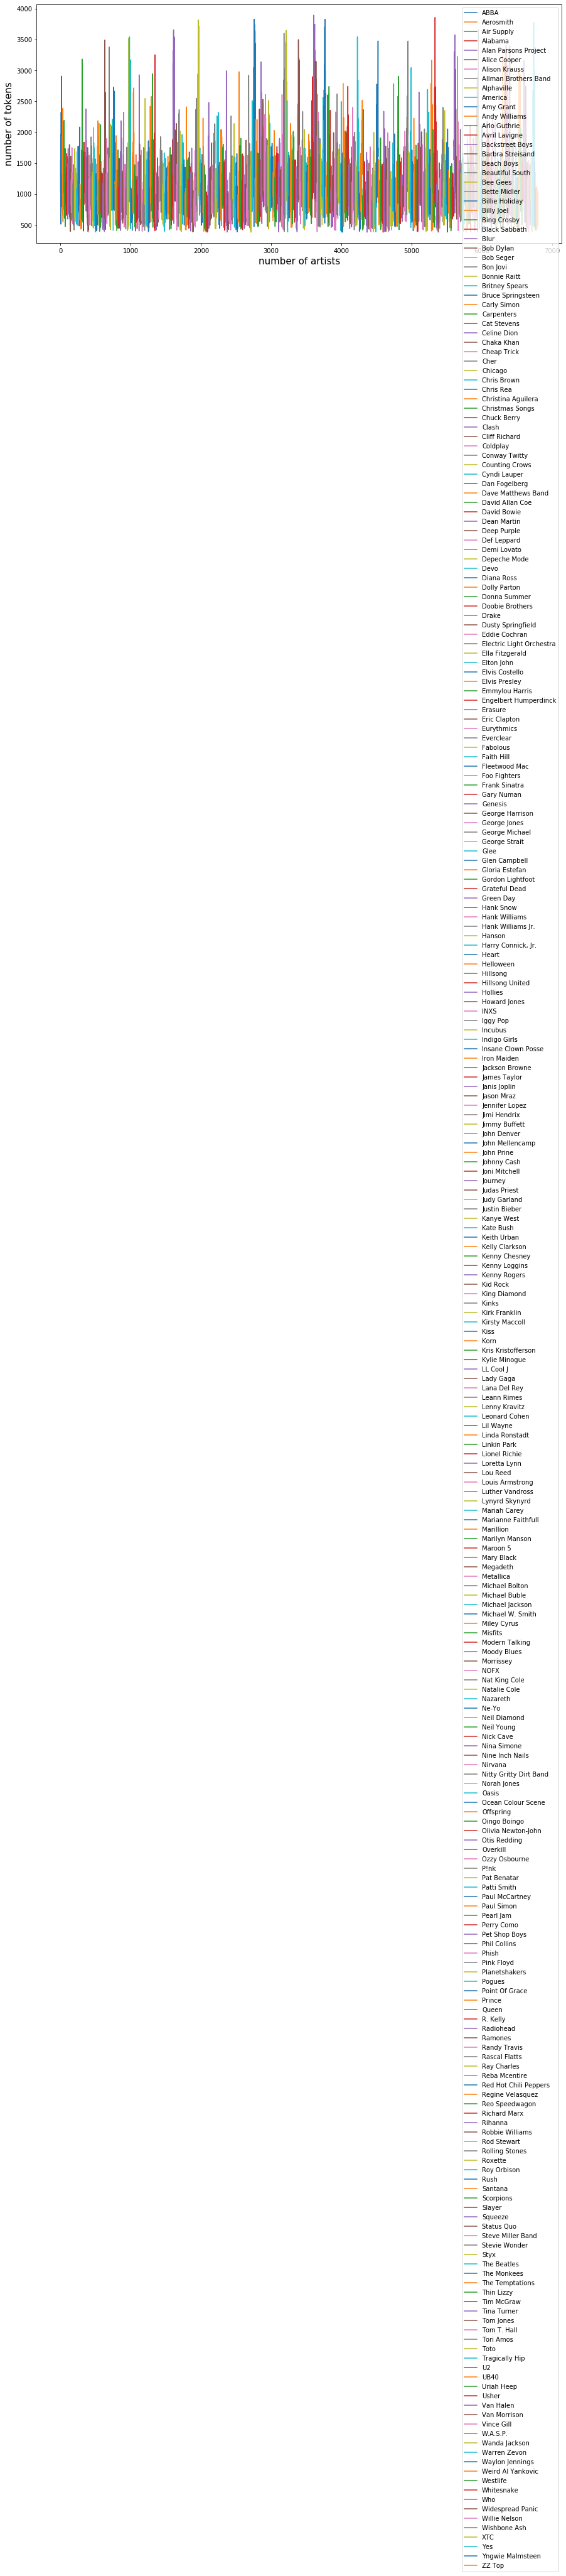

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('number of artists', fontsize = 15)
ax.set_ylabel('number of tokens', fontsize = 15)
df.groupby('artists')['number_of_tokens'].plot(ax=ax, legend = True)
plt.savefig("data25/number_of_tokens")

In [28]:
data1 = df[df['Genre1'] == 'Rock']

In [5]:
data2 = df[df['Genre1'] == 'Pop']
data3 = df[df['Genre1'] == 'Jazz']
data4 = df[df['Genre1'] == 'Electronic']
data5 = df[df['Genre1'] == 'Funk / Soul']
data6 = df[df['Genre1'] == 'Reggae']
data7 = df[df['Genre1'] == 'Hip Hop']
data8 = df[df['Genre1'] == 'Stage & Screen']
data9 = df[df['Genre1'] == 'Classical']
data10 = df[df['Genre1'] == 'Latin']
data11 = df[df['Genre1'] == 'Folk, World, & Country']

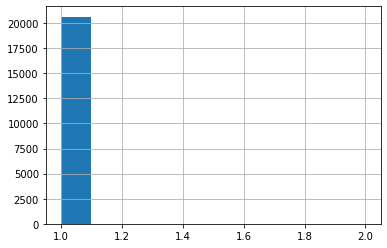

In [73]:
data10['text'].value_counts().hist()

## POS pro Genre <a name="three"></a>

In [71]:
data8['POS'].dropna(inplace=True)

In [72]:
list_of_names = data8['POS'].values.tolist()

In [73]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
counter = 0
wordFiltered = []
for l in list_of_names:
    tokens = word_tokenize(l) 
    for w in tokens:
        wordFiltered.append(w)
        counter += 1

In [74]:
counts_rock = Counter(wordFiltered)

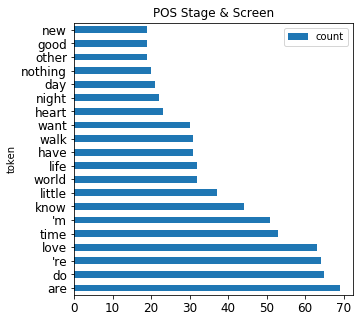

In [75]:
freq_df = pd.DataFrame.from_records(counts_rock.most_common(20), columns=['token', 'count'])

freq_df.plot(kind = 'barh', x = 'token', figsize=(5,5), title = 'POS Stage & Screen', fontsize=12)
plt.savefig("../../images/data25/POS/stage_screen_most_common_words_pos", bbox_inches = "tight")


In [183]:
df.dtypes

song                 object
artist               object
link                 object
text                 object
stemmed_text         object
POS                  object
POS_tags             object
Genre1               object
Genre2               object
genre1               object
genre2               object
number_of_tokens    float64
number_of_types     float64
date                  int64
decades              object
dtype: object